# Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay
from imblearn.over_sampling import RandomOverSampler


# Load Datasets

In [2]:
df_classification = pd.read_csv("../processed_files/df_for_ml.csv", index_col=[0])

In [3]:
df_classification = df_classification.drop(['ritardo_arrivo'], axis=1)

## Getting Ready

In [4]:
X_train, X_test, y_train, y_test = train_test_split(df_classification.loc[:, df_classification.columns != "isArrivoRitardo"].values , df_classification["isArrivoRitardo"].values , test_size=0.20, random_state=1)
print(f"X_train shape: {X_train.shape} | X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape} | y_test shape: {y_test.shape}")

X_train shape: (200847, 29) | X_test shape: (50212, 29)
y_train shape: (200847,) | y_test shape: (50212,)


# Classification Using Oversampling

In [5]:
ros = RandomOverSampler(random_state=42)
X_train, y_train = ros.fit_resample(X_train, y_train)

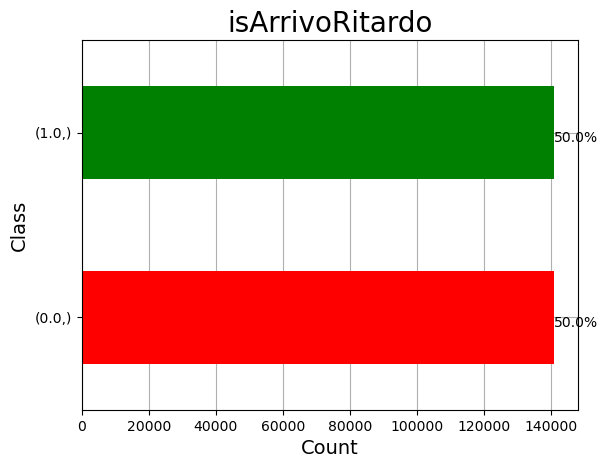

0.0    140900
1.0    140900
Name: count, dtype: int64


In [6]:
# Plotting the percentage of observations that fall under each class
ax = pd.DataFrame(y_train).value_counts().sort_values().plot(kind="barh", color=["r", "g"])
ax.set_axisbelow(True)
ax.grid()
totals= []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
     ax.text(i.get_width()+.3, i.get_y()+.20, 
     str(round((i.get_width()/total)*100, 2))+'%', 
     fontsize=10, color='black')
plt.title("isArrivoRitardo", fontsize=20)
plt.xlabel("Count", fontsize=14)
plt.ylabel("Class", fontsize=14)
plt.show()
print(pd.DataFrame(y_train).value_counts())
fig = ax.get_figure()
fig.savefig("../images/over_sampling_images/balance_over_sample.png")

### Decision Tree Classifier

              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95     35222
         1.0       0.88      0.89      0.88     14990

    accuracy                           0.93     50212
   macro avg       0.92      0.92      0.92     50212
weighted avg       0.93      0.93      0.93     50212



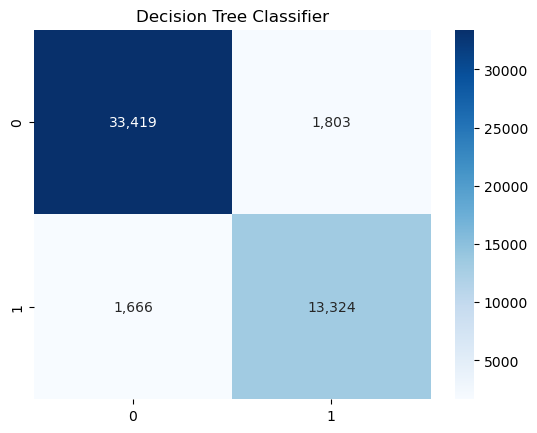

In [7]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
joblib.dump(model, "./models/over_sampling/DecisionTreeClassifier.joblib")
#model = joblib.load("./models/over_sampling/DecisionTreeClassifier.joblib")
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))                                                     
cf_matrix = confusion_matrix(y_test, y_pred )
sns.heatmap(cf_matrix, annot=True  , cmap='Blues', fmt=',d')
plt.title("Decision Tree Classifier")
plt.savefig("../images/over_sampling_images/DecisionTreeClassifier_os.png")

# Clean Memory
del model
del y_pred


### Random Forest

              precision    recall  f1-score   support

         0.0       0.96      0.97      0.97     35222
         1.0       0.93      0.91      0.92     14990

    accuracy                           0.95     50212
   macro avg       0.95      0.94      0.94     50212
weighted avg       0.95      0.95      0.95     50212



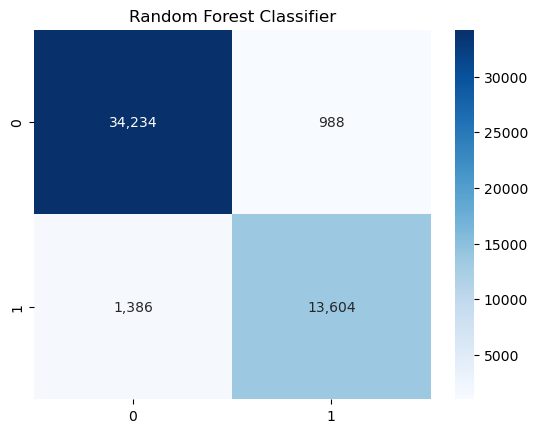

In [8]:
model = RandomForestClassifier(n_jobs=-1)

model.fit(X_train, y_train)
joblib.dump(model, "./models/over_sampling/RandomForestClassifier.joblib")
#model = joblib.load("./models/over_sampling/RandomForestClassifier.joblib")
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

cf_matrix = confusion_matrix(y_test, y_pred )
sns.heatmap(cf_matrix, annot=True  , cmap='Blues', fmt=',d')
plt.title("Random Forest Classifier")
plt.savefig("../images/over_sampling_images/RandomForestClassifier_os.png")

# Clean Memory
del model
del y_pred


### ExtraTreesClassifier

              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96     35222
         1.0       0.92      0.89      0.91     14990

    accuracy                           0.94     50212
   macro avg       0.94      0.93      0.93     50212
weighted avg       0.94      0.94      0.94     50212



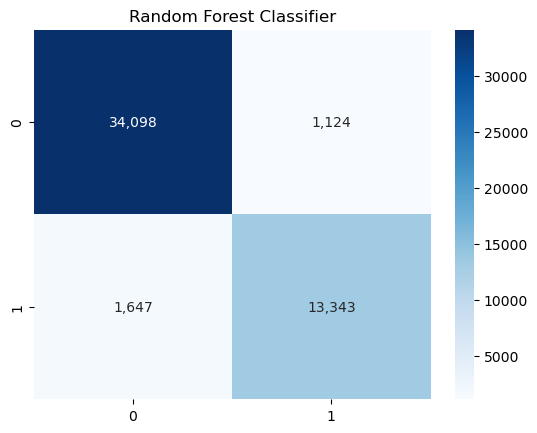

In [9]:
model = ExtraTreesClassifier(n_jobs=-1)
model.fit(X_train, y_train)
joblib.dump(model, "./models/over_sampling/ExtraTreesClassifier.joblib")
# model = joblib.load("./models/over_sampling/ExtraTreesClassifier.joblib")
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

cf_matrix = confusion_matrix(y_test, y_pred )
sns.heatmap(cf_matrix, annot=True  , cmap='Blues', fmt=',d')
plt.title("Random Forest Classifier")
plt.savefig("../images/over_sampling_images/ExtraTreesClassifier_os.png")

# Clean Memory
del model
del y_pred

### Gradient Boosting

              precision    recall  f1-score   support

         0.0       0.97      0.93      0.95     35222
         1.0       0.85      0.93      0.89     14990

    accuracy                           0.93     50212
   macro avg       0.91      0.93      0.92     50212
weighted avg       0.93      0.93      0.93     50212



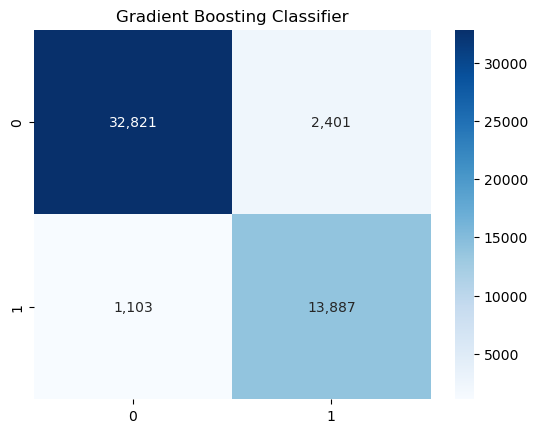

In [10]:
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
joblib.dump(model, "./models/over_sampling/GradientBoostingClassifier.joblib")
#model = joblib.load("./models/over_sampling/GradientBoostingClassifier.joblib")
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

cf_matrix = confusion_matrix(y_test, y_pred )
sns.heatmap(cf_matrix, annot=True  , cmap='Blues', fmt=',d')
plt.title("Gradient Boosting Classifier")
plt.savefig("../images/over_sampling_images/GradientBoostingClassifier_os.png")

# Statistic on Classifiers

In [11]:
stats = pd.DataFrame(columns=["classifiers", "fpr", "tpr", "auc"])


classifiers = ["DecisionTreeClassifier", "ExtraTreesClassifier", "GradientBoostingClassifier", "RandomForestClassifier"]
for classifier in classifiers:
    # Load the trained classifiers
    load_path = "./models/over_sampling/"+classifier+".joblib"
    model = joblib.load(load_path)
    y_pred = model.predict(X_test)
    fpr, tpr, _ = roc_curve(y_test,  y_pred)
    auc = roc_auc_score(y_test, y_pred)
    # Record the results
    row = {"classifiers": classifier,"fpr": fpr,"tpr": tpr,"auc": auc}
    stats = pd.concat([stats, pd.DataFrame([row])], ignore_index=True)
    
    del model
    del y_pred

# Set name of the classifiers as index labels
stats.set_index("classifiers", inplace=True)

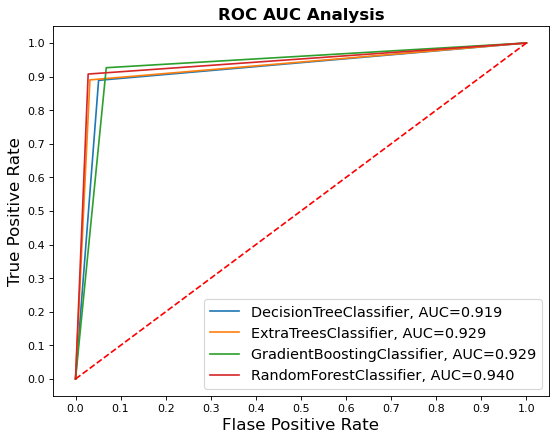

In [12]:
fig = plt.figure(figsize=(8,6), dpi=80)
for classifier in stats.index:
    plt.plot(stats.loc[classifier]["fpr"], 
             stats.loc[classifier]["tpr"], 
             label="{}, AUC={:.3f}".format(classifier, stats.loc[classifier]["auc"]))
    
plt.plot([0,1], [0,1], color='red', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title("ROC AUC Analysis", fontweight="bold", fontsize=15)
plt.legend(prop={"size":13}, loc="lower right")

plt.show()
fig.savefig("../images/over_sampling_images/classifiers_statistics_os.png")